In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# tf.Session(config=tf.ConfigProto(allow_growth=True))

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Original shape: (32, 32, 3)


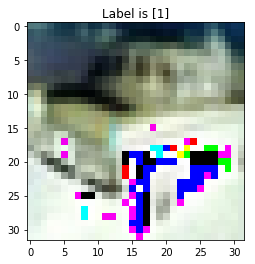

Original shape: (32, 32, 3)


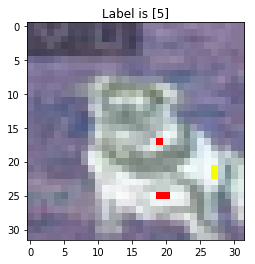

Original shape: (32, 32, 3)


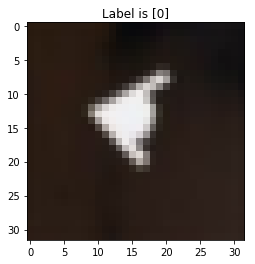

In [5]:
for i in range(1520,1523):
    print("Original shape: {}".format(x_train[i].shape))
    pixels, label = x_train[i], y_train[i]
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels)
    plt.grid(False)
    plt.show()

In [6]:
batch_size = 32
num_classes = 10
epochs = 100
num_predictions = 20

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### First model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(28, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test), shuffle=True)

### More sophisticated model

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 787us/step - loss: 0.8816 - acc: 0.6938 - val_loss: 0.8261 - val_acc: 0.7125
Epoch 2/10
50000/50000 [==============================] - 38s 761us/step - loss: 0.8608 - acc: 0.7023 - val_loss: 0.8219 - val_acc: 0.7194
Epoch 3/10
50000/50000 [==============================] - 38s 763us/step - loss: 0.8360 - acc: 0.7108 - val_loss: 0.7998 - val_acc: 0.7223
Epoch 4/10
50000/50000 [==============================] - 39s 783us/step - loss: 0.8191 - acc: 0.7143 - val_loss: 0.7828 - val_acc: 0.7285
Epoch 5/10
50000/50000 [==============================] - 39s 779us/step - loss: 0.8009 - acc: 0.7247 - val_loss: 0.7989 - val_acc: 0.7307
Epoch 6/10
50000/50000 [==============================] - 39s 775us/step - loss: 0.7871 - acc: 0.7278 - val_loss: 0.7594 - val_acc: 0.7390
Epoch 7/10
50000/50000 [==============================] - 39s 786us/step - loss: 0.7741 - acc: 0.7336 - val_loss: 0.

### Try: batch_size *= 2 

In [18]:
model.fit(x_train, y_train, batch_size=2 * batch_size, epochs=1, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 518s - loss: 1.4997 - acc: 0.4549 - val_loss: 1.3784 - val_acc: 0.5074

### Results:
* First model, 2 conv layers (1 epoch): val_acc: 0.4736
* More sophisticated model, 4 conv layer